## Import libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

## Get the data

In [2]:
df = pd.read_csv("../../../datasets/parte2/treino/dataset.csv")

## Feature engineering

#### Split date

In [3]:
df['date'] = pd.to_datetime(df['date'], format="%Y-%m-%d", utc=True)
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df.drop(['date'], inplace=True, axis=1)


df.head()

,dt,city_name,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,...,clouds_all,weather_description,hour,normal,economic_schedule,self-consumption,injection,year,month,day
0,1632873600,local,13.97,13.54,11.45,14.04,1027,NaN,NaN,81,...,87,overcast clouds,0,0.0,0.0,0.0,NaN,2021,9,29
1,1632877200,local,13.48,13.02,13.43,13.90,1028,NaN,NaN,82,...,91,overcast clouds,1,0.0,0.0,0.0,NaN,2021,9,29
2,1632880800,local,12.93,12.47,12.72,13.43,1027,NaN,NaN,84,...,93,overcast clouds,2,0.0,0.0,0.0,NaN,2021,9,29
3,1632884400,local,12.61,12.15,10.34,12.93,1027,NaN,NaN,85,...,95,overcast clouds,3,0.0,0.0,0.0,NaN,2021,9,29
4,1632888000,local,12.61,12.17,9.79,12.93,1027,NaN,NaN,86,...,93,overcast clouds,4,0.0,0.0,0.0,NaN,2021,9,29


#### See the outliers

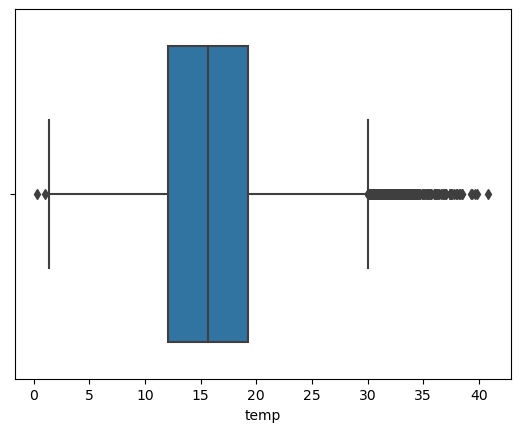

In [4]:
sns.boxplot(x=df['temp'])
plt.show()
Q1 = df['temp'].quantile(0.25)
Q3 = df['temp'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['temp'] >= Q1 - 1.5 * IQR) & (df['temp'] <= Q3 + 1.5 * IQR)]

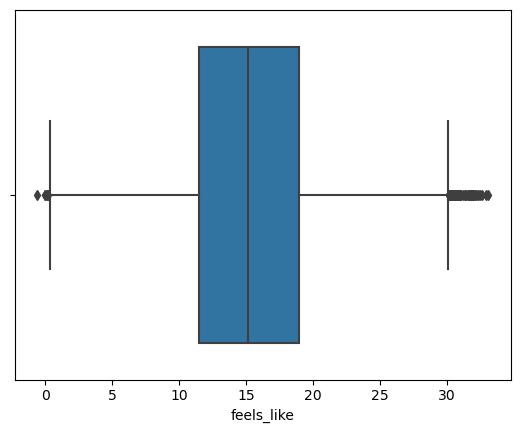

In [5]:
sns.boxplot(x=df['feels_like'])
plt.show()
Q1 = df['feels_like'].quantile(0.25)
Q3 = df['feels_like'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['feels_like'] >= Q1 - 1.5 * IQR) & (df['feels_like'] <= Q3 + 1.5 * IQR)]

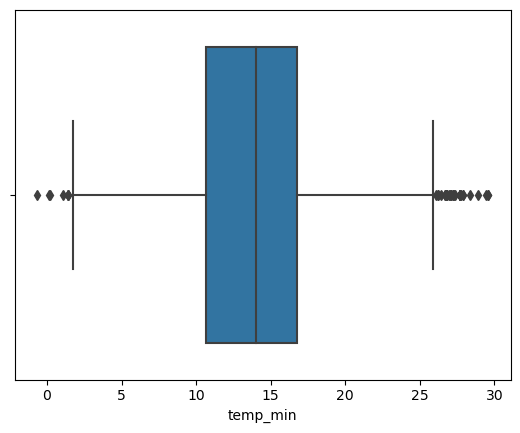

In [6]:
sns.boxplot(x=df['temp_min'])
plt.show()
Q1 = df['temp_min'].quantile(0.25)
Q3 = df['temp_min'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['temp_min'] >= Q1 - 1.5 * IQR) & (df['temp_min'] <= Q3 + 1.5 * IQR)]

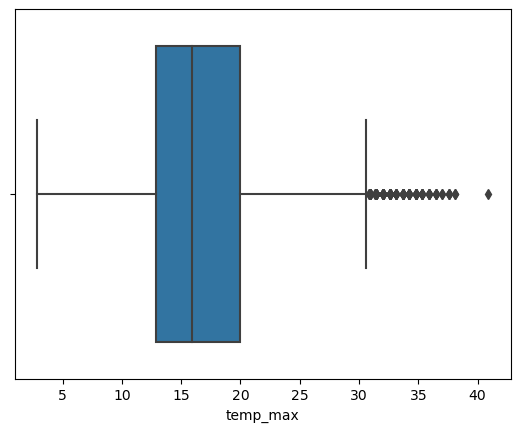

In [7]:
sns.boxplot(x=df['temp_max'])
plt.show()
Q1 = df['temp_max'].quantile(0.25)
Q3 = df['temp_max'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['temp_max'] >= Q1 - 1.5 * IQR) & (df['temp_max'] <= Q3 + 1.5 * IQR)]


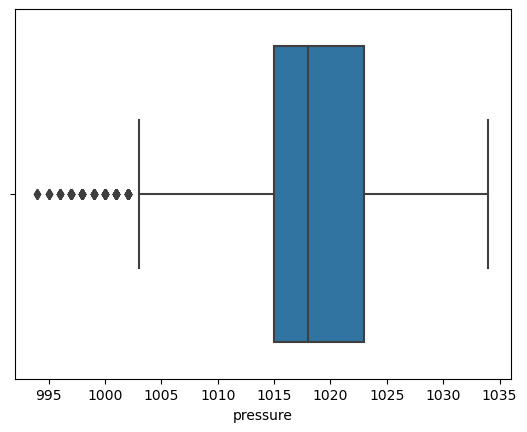

In [8]:
sns.boxplot(x=df['pressure'])
plt.show()
Q1 = df['pressure'].quantile(0.25)
Q3 = df['pressure'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['pressure'] >= Q1 - 1.5 * IQR) & (df['pressure'] <= Q3 + 1.5 * IQR)]

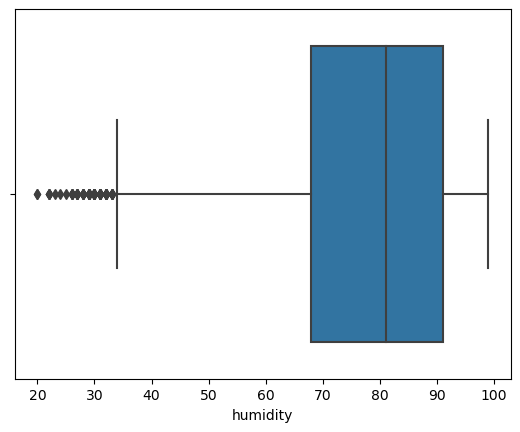

In [9]:
sns.boxplot(x=df['humidity'])
plt.show()
Q1 = df['humidity'].quantile(0.25)
Q3 = df['humidity'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['humidity'] >= Q1 - 1.5 * IQR) & (df['humidity'] <= Q3 + 1.5 * IQR)]

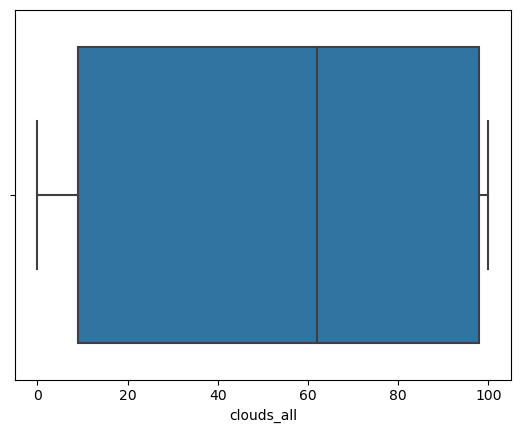

In [10]:
sns.boxplot(x=df['clouds_all'])
plt.show()
Q1 = df['clouds_all'].quantile(0.25)
Q3 = df['clouds_all'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['clouds_all'] >= Q1 - 1.5 * IQR) & (df['clouds_all'] <= Q3 + 1.5 * IQR)]

#### Remove city_name

In [11]:
df.drop('city_name', axis=1, inplace=True)

df.head()

,dt,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,...,clouds_all,weather_description,hour,normal,economic_schedule,self-consumption,injection,year,month,day
0,1632873600,13.97,13.54,11.45,14.04,1027,NaN,NaN,81,1.96,...,87,overcast clouds,0,0.0,0.0,0.0,NaN,2021,9,29
1,1632877200,13.48,13.02,13.43,13.90,1028,NaN,NaN,82,1.83,...,91,overcast clouds,1,0.0,0.0,0.0,NaN,2021,9,29
2,1632880800,12.93,12.47,12.72,13.43,1027,NaN,NaN,84,1.96,...,93,overcast clouds,2,0.0,0.0,0.0,NaN,2021,9,29
3,1632884400,12.61,12.15,10.34,12.93,1027,NaN,NaN,85,1.85,...,95,overcast clouds,3,0.0,0.0,0.0,NaN,2021,9,29
4,1632888000,12.61,12.17,9.79,12.93,1027,NaN,NaN,86,1.83,...,93,overcast clouds,4,0.0,0.0,0.0,NaN,2021,9,29


#### Remove day, month, year and hour

In [12]:
df.drop('hour', axis=1, inplace=True)
df.drop('day', axis=1, inplace=True)
df.drop('month', axis=1, inplace=True)
df.drop('year', axis=1, inplace=True)

df.head()

,dt,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,rain_1h,clouds_all,weather_description,normal,economic_schedule,self-consumption,injection
0,1632873600,13.97,13.54,11.45,14.04,1027,NaN,NaN,81,1.96,NaN,87,overcast clouds,0.0,0.0,0.0,NaN
1,1632877200,13.48,13.02,13.43,13.90,1028,NaN,NaN,82,1.83,NaN,91,overcast clouds,0.0,0.0,0.0,NaN
2,1632880800,12.93,12.47,12.72,13.43,1027,NaN,NaN,84,1.96,NaN,93,overcast clouds,0.0,0.0,0.0,NaN
3,1632884400,12.61,12.15,10.34,12.93,1027,NaN,NaN,85,1.85,NaN,95,overcast clouds,0.0,0.0,0.0,NaN
4,1632888000,12.61,12.17,9.79,12.93,1027,NaN,NaN,86,1.83,NaN,93,overcast clouds,0.0,0.0,0.0,NaN


#### Remove dt

In [13]:
df.drop('dt', axis=1, inplace=True)

df.head()

,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,rain_1h,clouds_all,weather_description,normal,economic_schedule,self-consumption,injection
0,13.97,13.54,11.45,14.04,1027,NaN,NaN,81,1.96,NaN,87,overcast clouds,0.0,0.0,0.0,NaN
1,13.48,13.02,13.43,13.90,1028,NaN,NaN,82,1.83,NaN,91,overcast clouds,0.0,0.0,0.0,NaN
2,12.93,12.47,12.72,13.43,1027,NaN,NaN,84,1.96,NaN,93,overcast clouds,0.0,0.0,0.0,NaN
3,12.61,12.15,10.34,12.93,1027,NaN,NaN,85,1.85,NaN,95,overcast clouds,0.0,0.0,0.0,NaN
4,12.61,12.17,9.79,12.93,1027,NaN,NaN,86,1.83,NaN,93,overcast clouds,0.0,0.0,0.0,NaN


#### Remove feels_like

In [14]:
df.drop('feels_like', axis=1, inplace=True)

df.head()

,temp,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,rain_1h,clouds_all,weather_description,normal,economic_schedule,self-consumption,injection
0,13.97,11.45,14.04,1027,NaN,NaN,81,1.96,NaN,87,overcast clouds,0.0,0.0,0.0,NaN
1,13.48,13.43,13.90,1028,NaN,NaN,82,1.83,NaN,91,overcast clouds,0.0,0.0,0.0,NaN
2,12.93,12.72,13.43,1027,NaN,NaN,84,1.96,NaN,93,overcast clouds,0.0,0.0,0.0,NaN
3,12.61,10.34,12.93,1027,NaN,NaN,85,1.85,NaN,95,overcast clouds,0.0,0.0,0.0,NaN
4,12.61,9.79,12.93,1027,NaN,NaN,86,1.83,NaN,93,overcast clouds,0.0,0.0,0.0,NaN


## Label enconding

In [15]:
lb_make = LabelEncoder()

df['weather_description_encoded'] = lb_make.fit_transform(df['weather_description'])
df.drop('weather_description', axis=1, inplace=True)

df.head()

,temp,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,rain_1h,clouds_all,normal,economic_schedule,self-consumption,injection,weather_description_encoded
0,13.97,11.45,14.04,1027,NaN,NaN,81,1.96,NaN,87,0.0,0.0,0.0,NaN,5
1,13.48,13.43,13.90,1028,NaN,NaN,82,1.83,NaN,91,0.0,0.0,0.0,NaN,5
2,12.93,12.72,13.43,1027,NaN,NaN,84,1.96,NaN,93,0.0,0.0,0.0,NaN,5
3,12.61,10.34,12.93,1027,NaN,NaN,85,1.85,NaN,95,0.0,0.0,0.0,NaN,5
4,12.61,9.79,12.93,1027,NaN,NaN,86,1.83,NaN,93,0.0,0.0,0.0,NaN,5


## Missing Values

#### Remove sea_level, grnd_level and rain_1h

In [16]:
df.drop('sea_level', axis=1, inplace=True)
df.drop('grnd_level', axis=1, inplace=True)
df.drop('rain_1h', axis=1, inplace=True)

df.head()

,temp,temp_min,temp_max,pressure,humidity,wind_speed,clouds_all,normal,economic_schedule,self-consumption,injection,weather_description_encoded
0,13.97,11.45,14.04,1027,81,1.96,87,0.0,0.0,0.0,NaN,5
1,13.48,13.43,13.90,1028,82,1.83,91,0.0,0.0,0.0,NaN,5
2,12.93,12.72,13.43,1027,84,1.96,93,0.0,0.0,0.0,NaN,5
3,12.61,10.34,12.93,1027,85,1.85,95,0.0,0.0,0.0,NaN,5
4,12.61,9.79,12.93,1027,86,1.83,93,0.0,0.0,0.0,NaN,5


## Write new csv

In [17]:
df['injection'] = df['injection'].fillna("None")

In [18]:
df.to_csv('../../../datasets/parte2/treino/dataset_prepared.csv', index=False)

<Axes: >

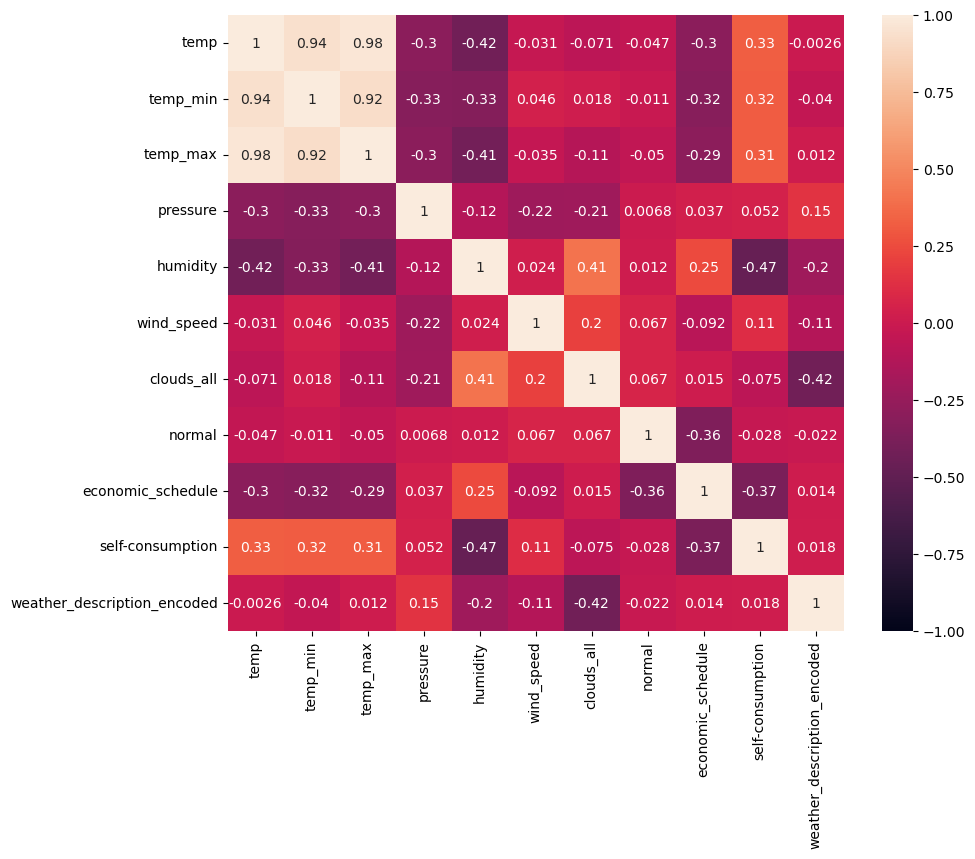

In [19]:
corr_matrix = df.corr(numeric_only=True)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, square=True, annot=True)